## Plot the polynomial fit on the Pima dataset (included) for degree 1 through 7 against the scatter plot of the data. Also note the change in the proport explained variance due to X, analyze, and choose the appropriate degree fit.

In [ ]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
my_path = '/content/drive/My Drive/pima.csv'
pima = pd.read_csv(my_path, header=None)
pima.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
Y = pd.DataFrame(pima.iloc[:,8])
X = pima.iloc[:,list(range(0,8))]

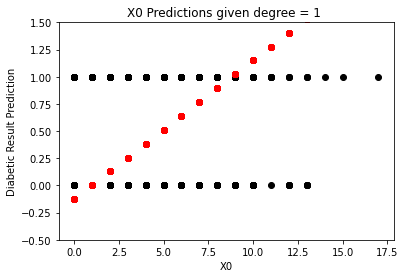

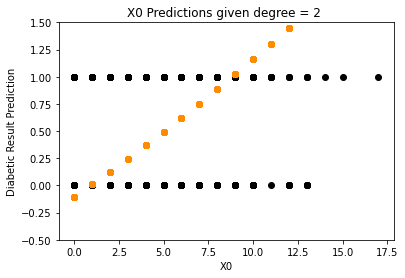

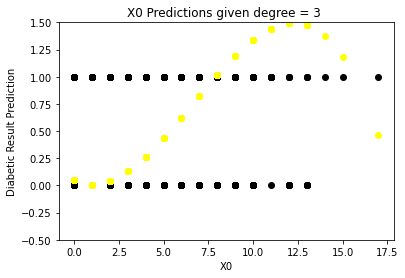

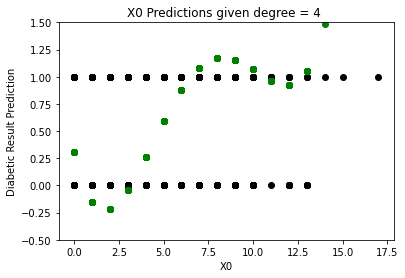

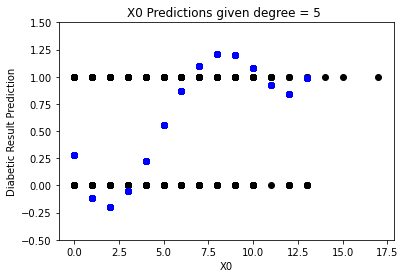

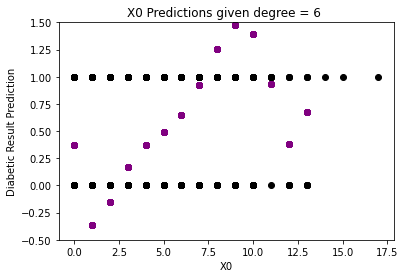

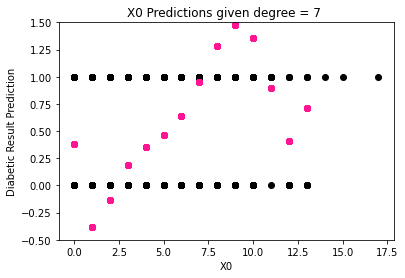

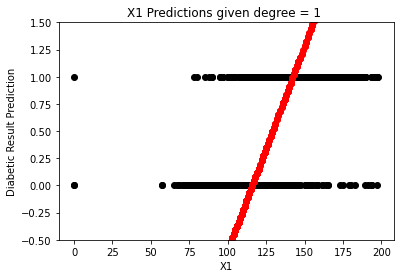

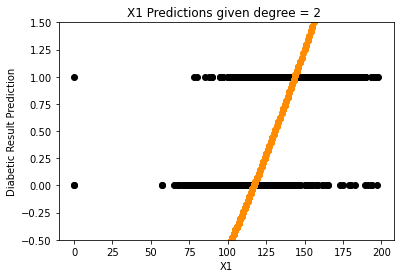

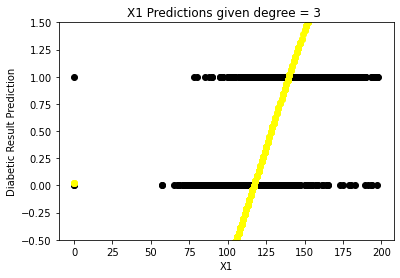

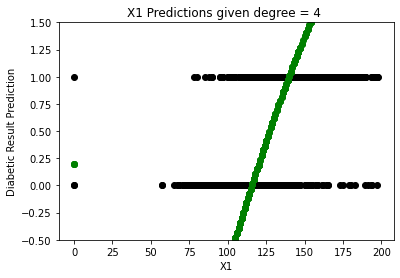

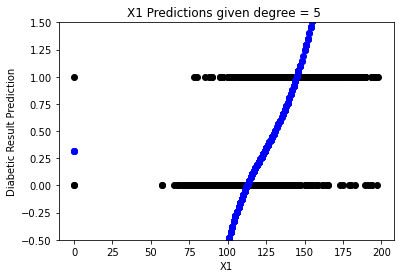

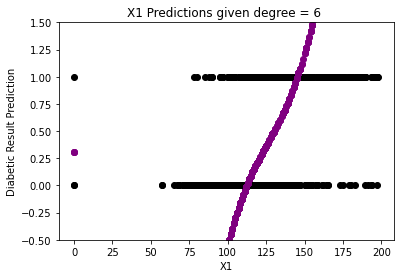

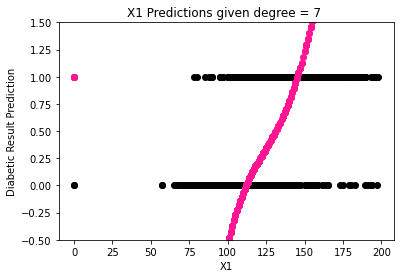

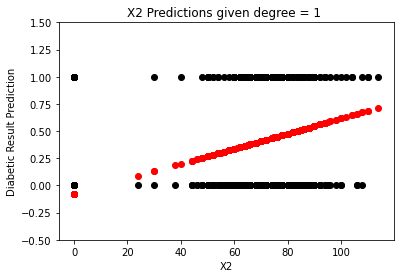

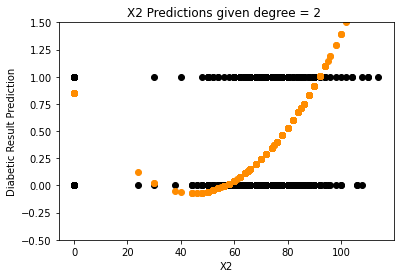

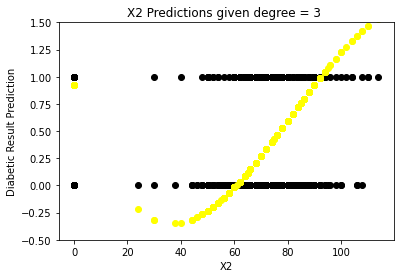

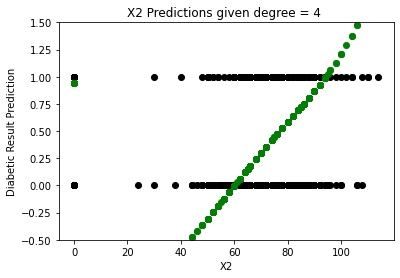

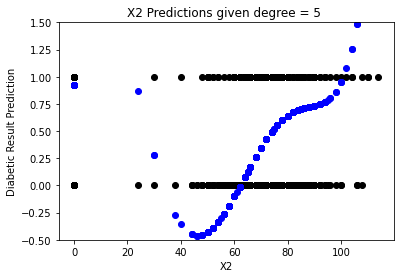

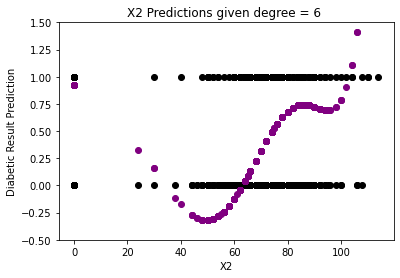

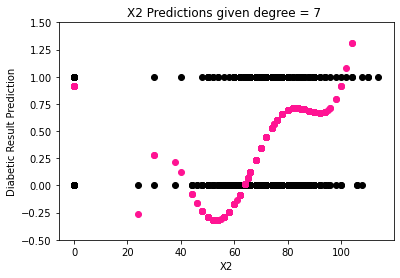

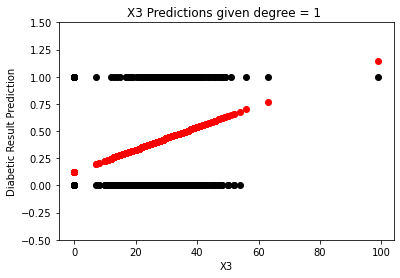

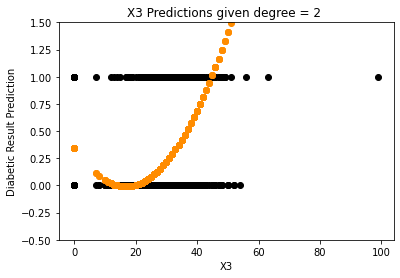

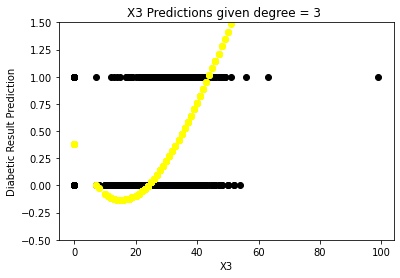

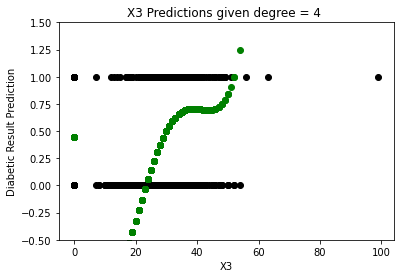

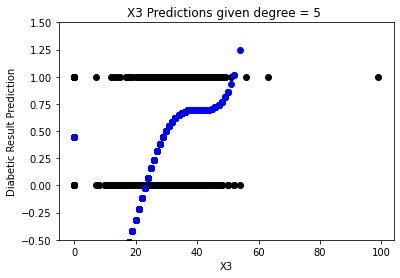

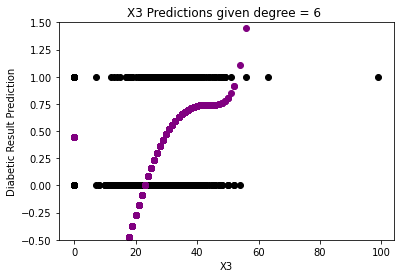

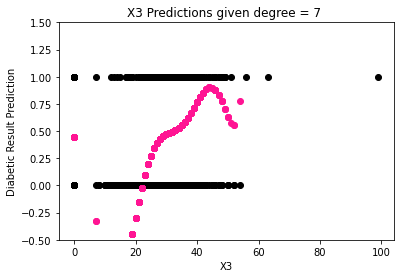

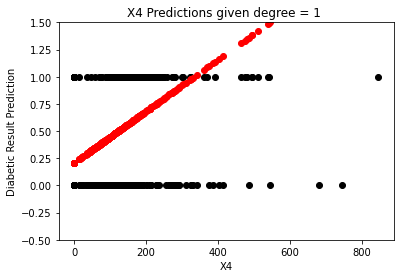

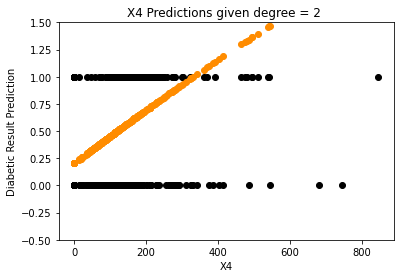

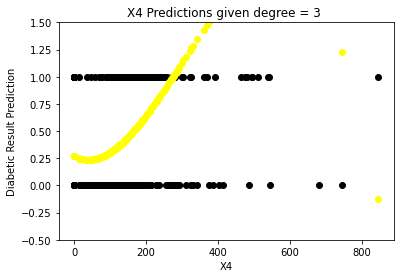

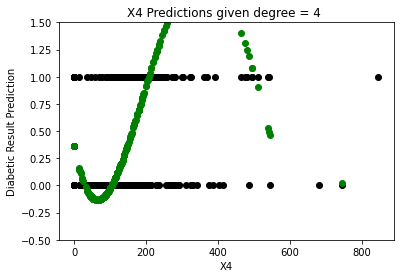

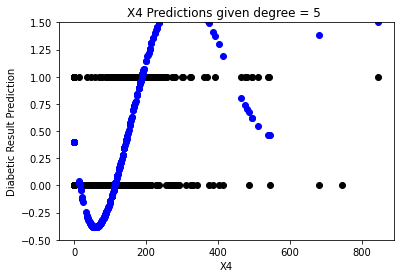

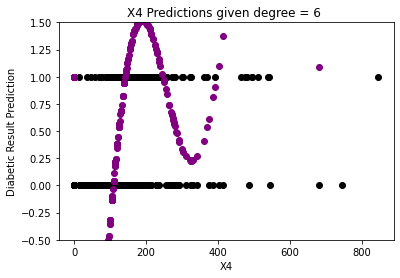

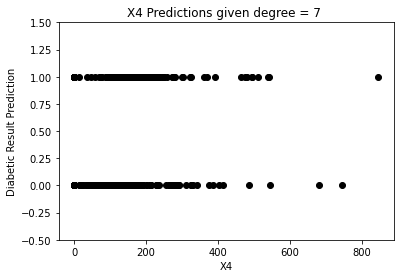

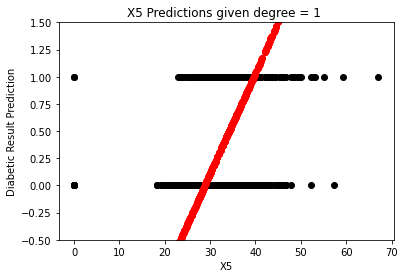

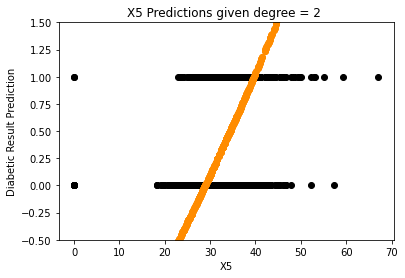

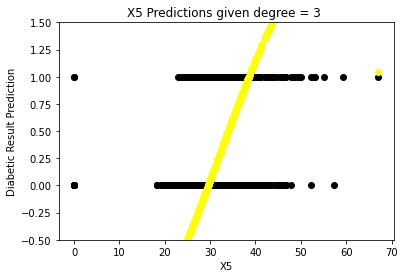

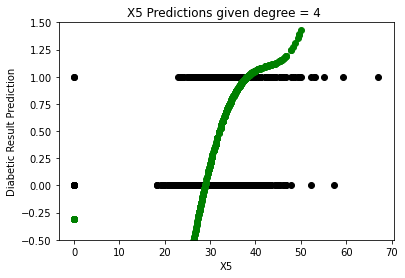

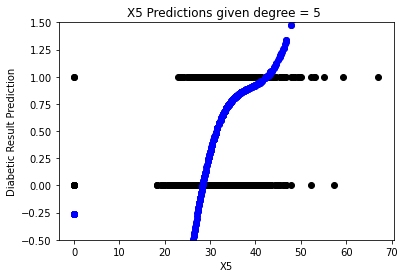

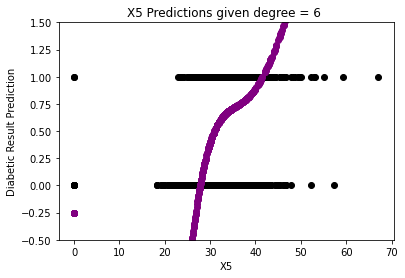

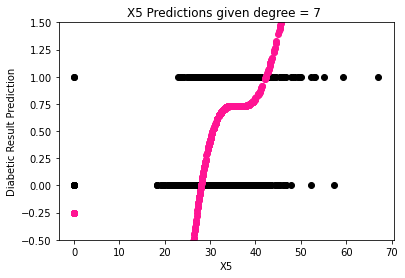

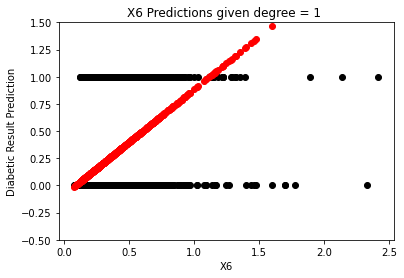

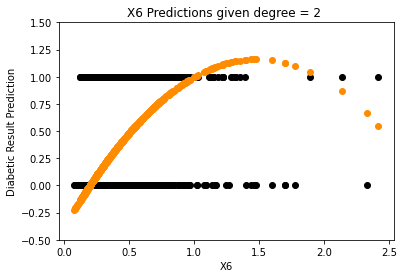

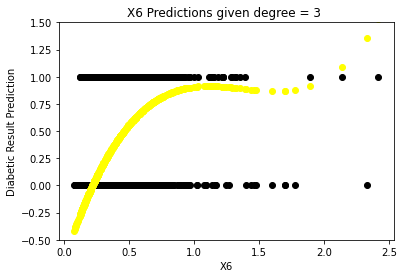

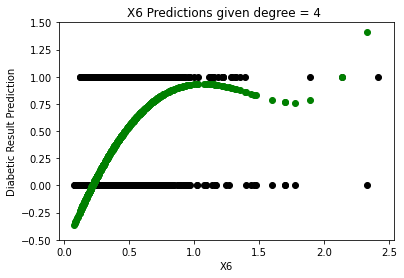

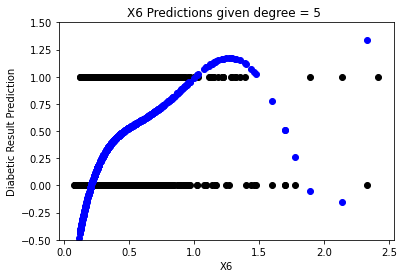

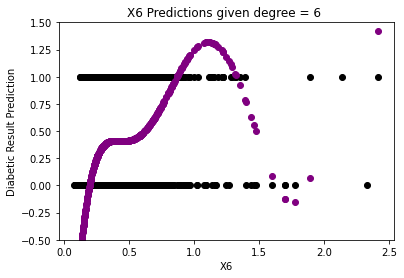

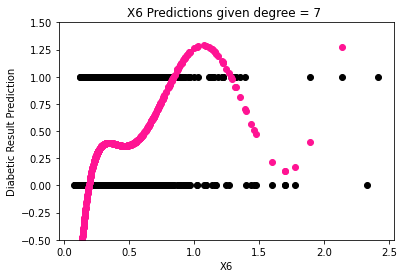

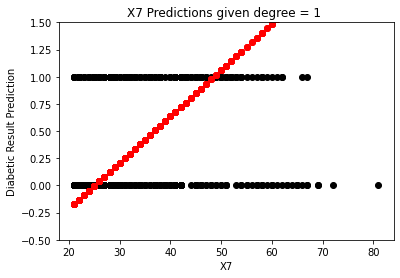

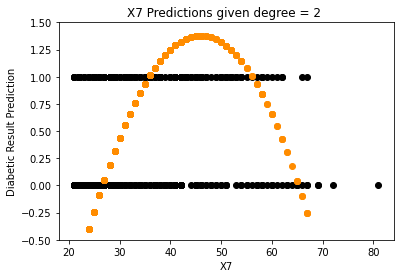

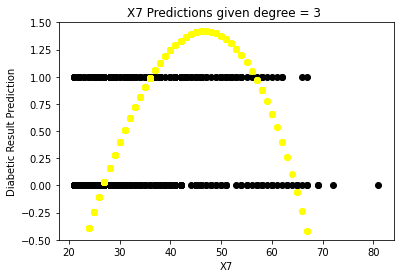

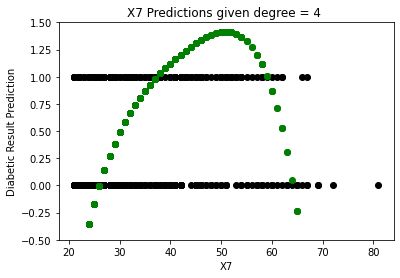

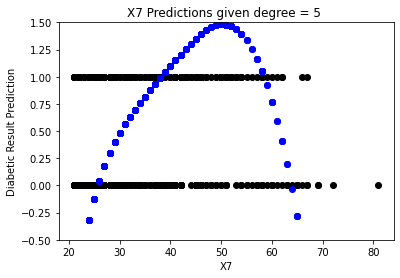

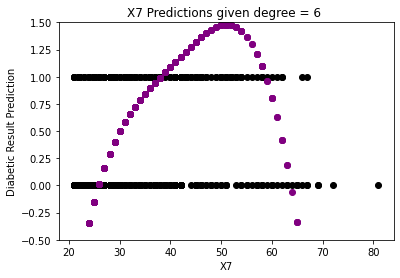

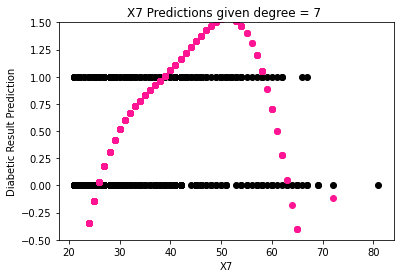

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression #
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 


# converting the polynomial function into something graphable 
def poly_fun(x_poly, params):
  y_list = [] # create a list of Y values which are the polynomially fitted X values plugged into the GLM coefficients
  for item in x_poly:  # for each of the polynomially fitted x value sets
    tot = item[0]  # the total starts with the y intercept 
    for i in range(len(params)):  
      tot = tot + (item[i]*params[i]) # then add the value of the x multiplied by parameter defined by the GLM
    y_list.append(tot)
  return (y_list)



for j in range(0, 8):  # for each X feature
  X_train, X_test, y_train, y_test = train_test_split(X[j], Y, test_size=0.2) # split the data into train and test sets 
  colors = ['red', 'darkorange', 'yellow', 'green', 'blue', 'purple', 'deeppink']
  for i in range(1,8): # for each 

    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train.values.reshape(-1, 1))  # generate an array of 'i' polynomial x values
    model = sm.GLM(y_train.values, X_poly,family=sm.families.Binomial()).fit()  # fit the model to the GLM
    params = model.params  # get the coefficients for the polynomial/GLM equation

    plt.scatter(X_train, y_train, color = 'black')
    plt.scatter(X_train, poly_fun(X_poly, params), color = colors[i-1])
    plt.xlabel('X{}'.format(j))
    plt.ylabel('Diabetic Result Prediction')
    plt.title("X{} Predictions given degree = {} ".format(j, i))
    plt.ylim(-0.5, 1.5)
    plt.show()